In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

plt.rcParams["figure.figsize"] = [40, 20]

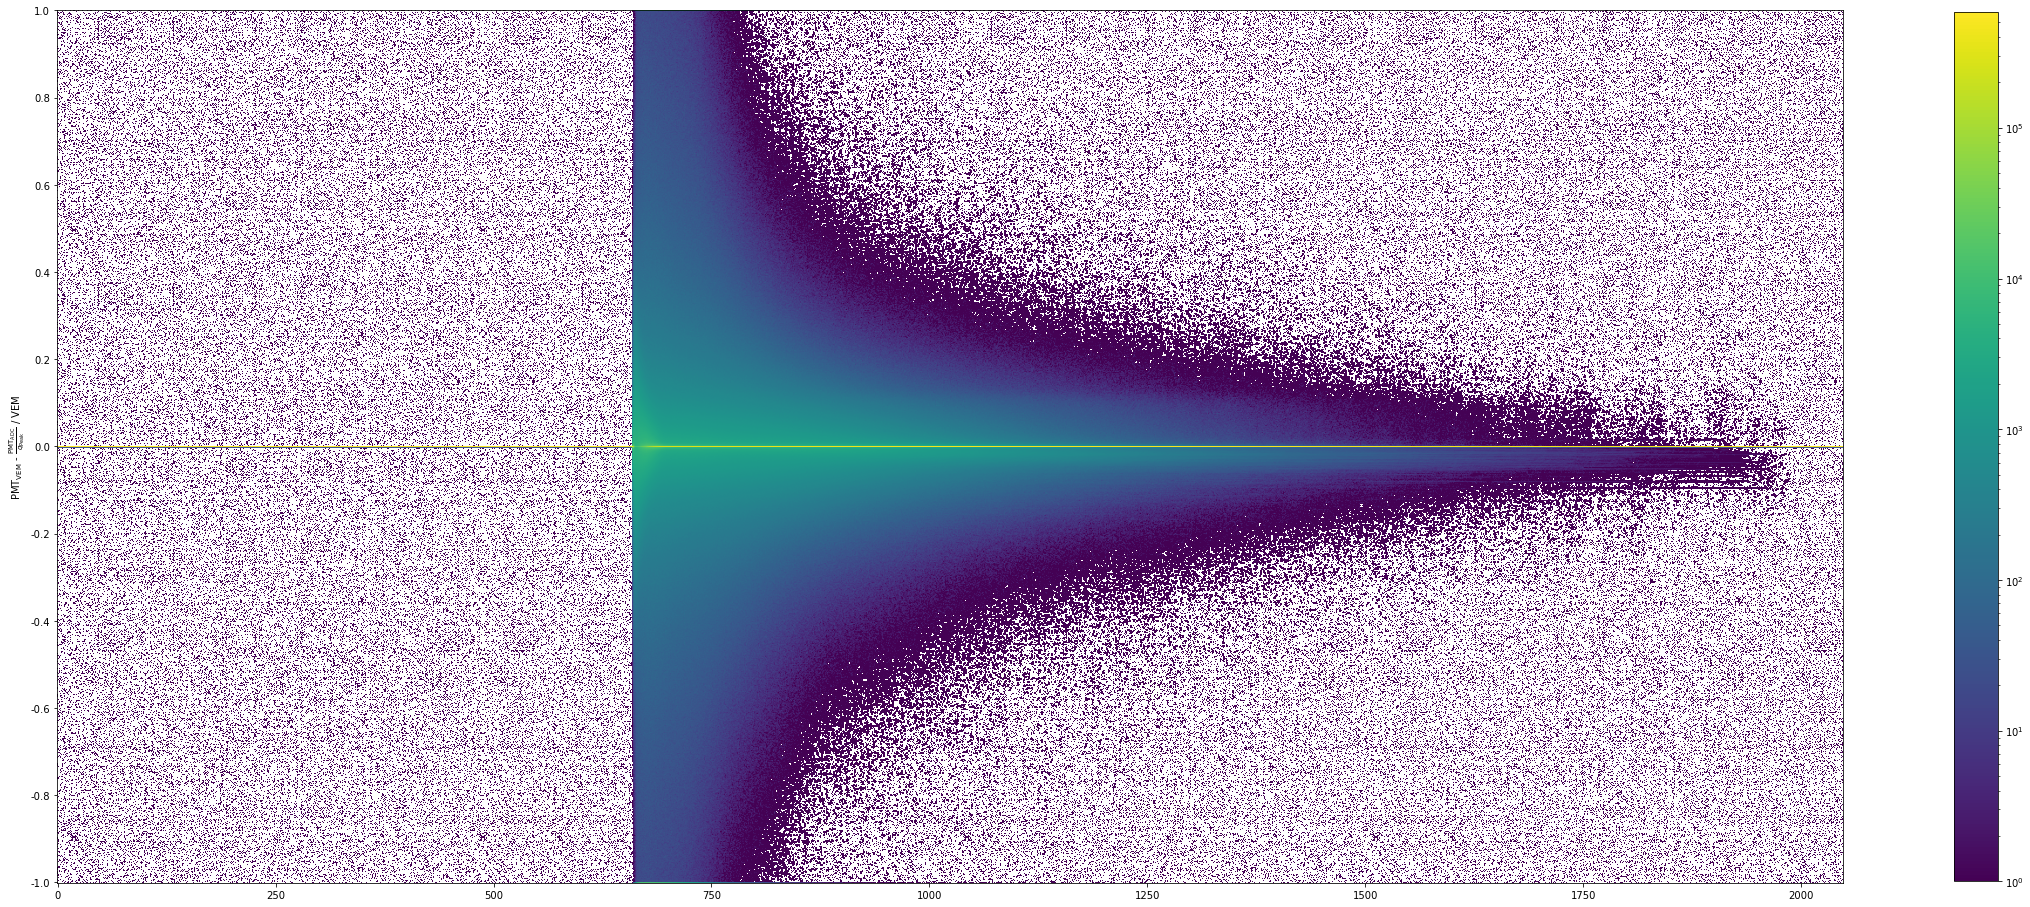

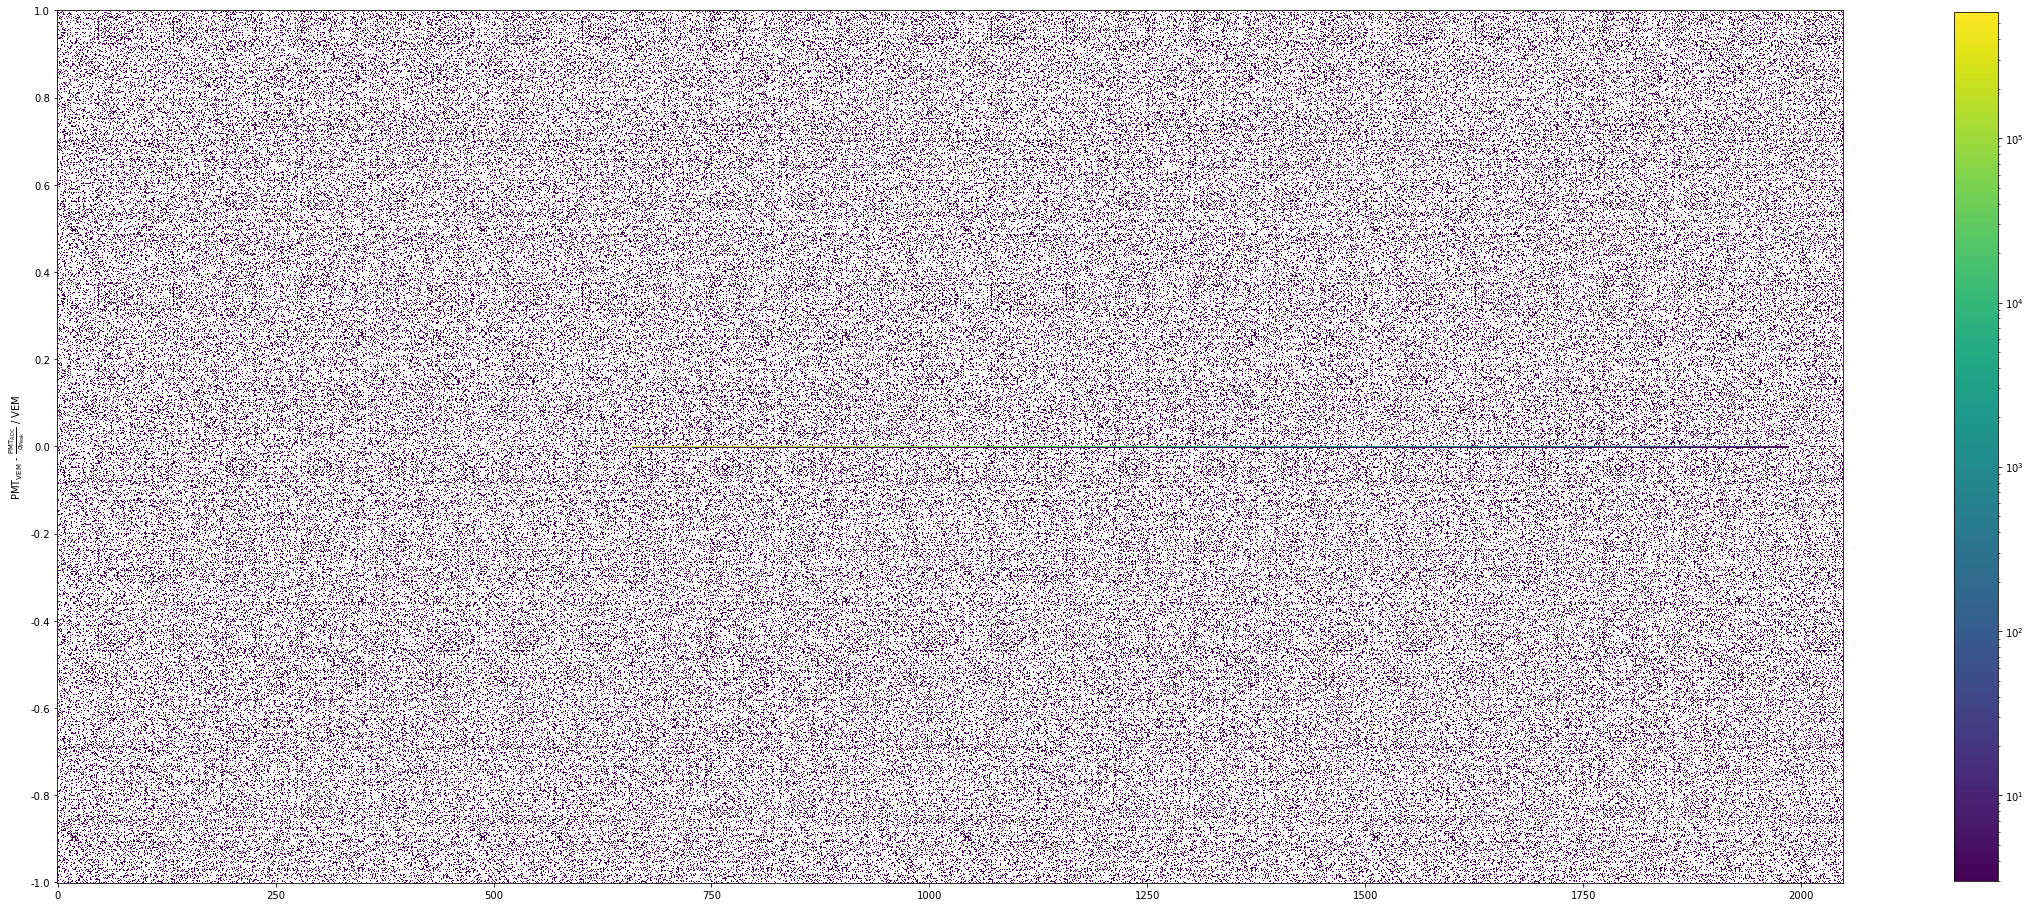

In [5]:
image_normed = np.loadtxt("/cr/tempdata01/filip/QGSJET-II/COMPARE/diff_normed.csv")
image = np.loadtxt("/cr/tempdata01/filip/QGSJET-II/COMPARE/diff.csv")

fig = plt.figure()

unnormed = plt.imshow(image, origin = "lower", norm = colors.LogNorm())
_, _ = plt.yticks(np.arange(0, 1001, 100), [f"{b:.1f}" for b in np.arange(0, 1001, 100)/500 - 1],)
plt.ylabel(r"PMT$_\mathrm{VEM}$ - $\frac{\mathrm{PMT}_\mathrm{ADC}}{q_\mathrm{Peak}}$ / VEM")
fig.colorbar(unnormed, shrink = 0.8)

fig = plt.figure()
normed = plt.imshow(image_normed, origin = "lower", norm = colors.LogNorm())
_, _ = plt.yticks(np.arange(0, 1001, 100), [f"{b:.1f}" for b in np.arange(0, 1001, 100)/500 - 1])
plt.ylabel(r"PMT$_\mathrm{VEM}$ - $\frac{\mathrm{PMT}_\mathrm{ADC}}{q_\mathrm{Peak}}$ / VEM")
fig.colorbar(normed, shrink = 0.8)

In [9]:
print(image.shape)

(1001, 2048)


In [14]:
print(np.mean(image, axis = 0).shape)

(2048,)


In [18]:
print(np.mean(image, axis = 0)[658:])

[590.37962038 590.37962038 590.37962038 ... 590.37962038 590.37962038
 590.37962038]


In [36]:
print(np.mean(image.T, axis = 1).shape)

(2048,)


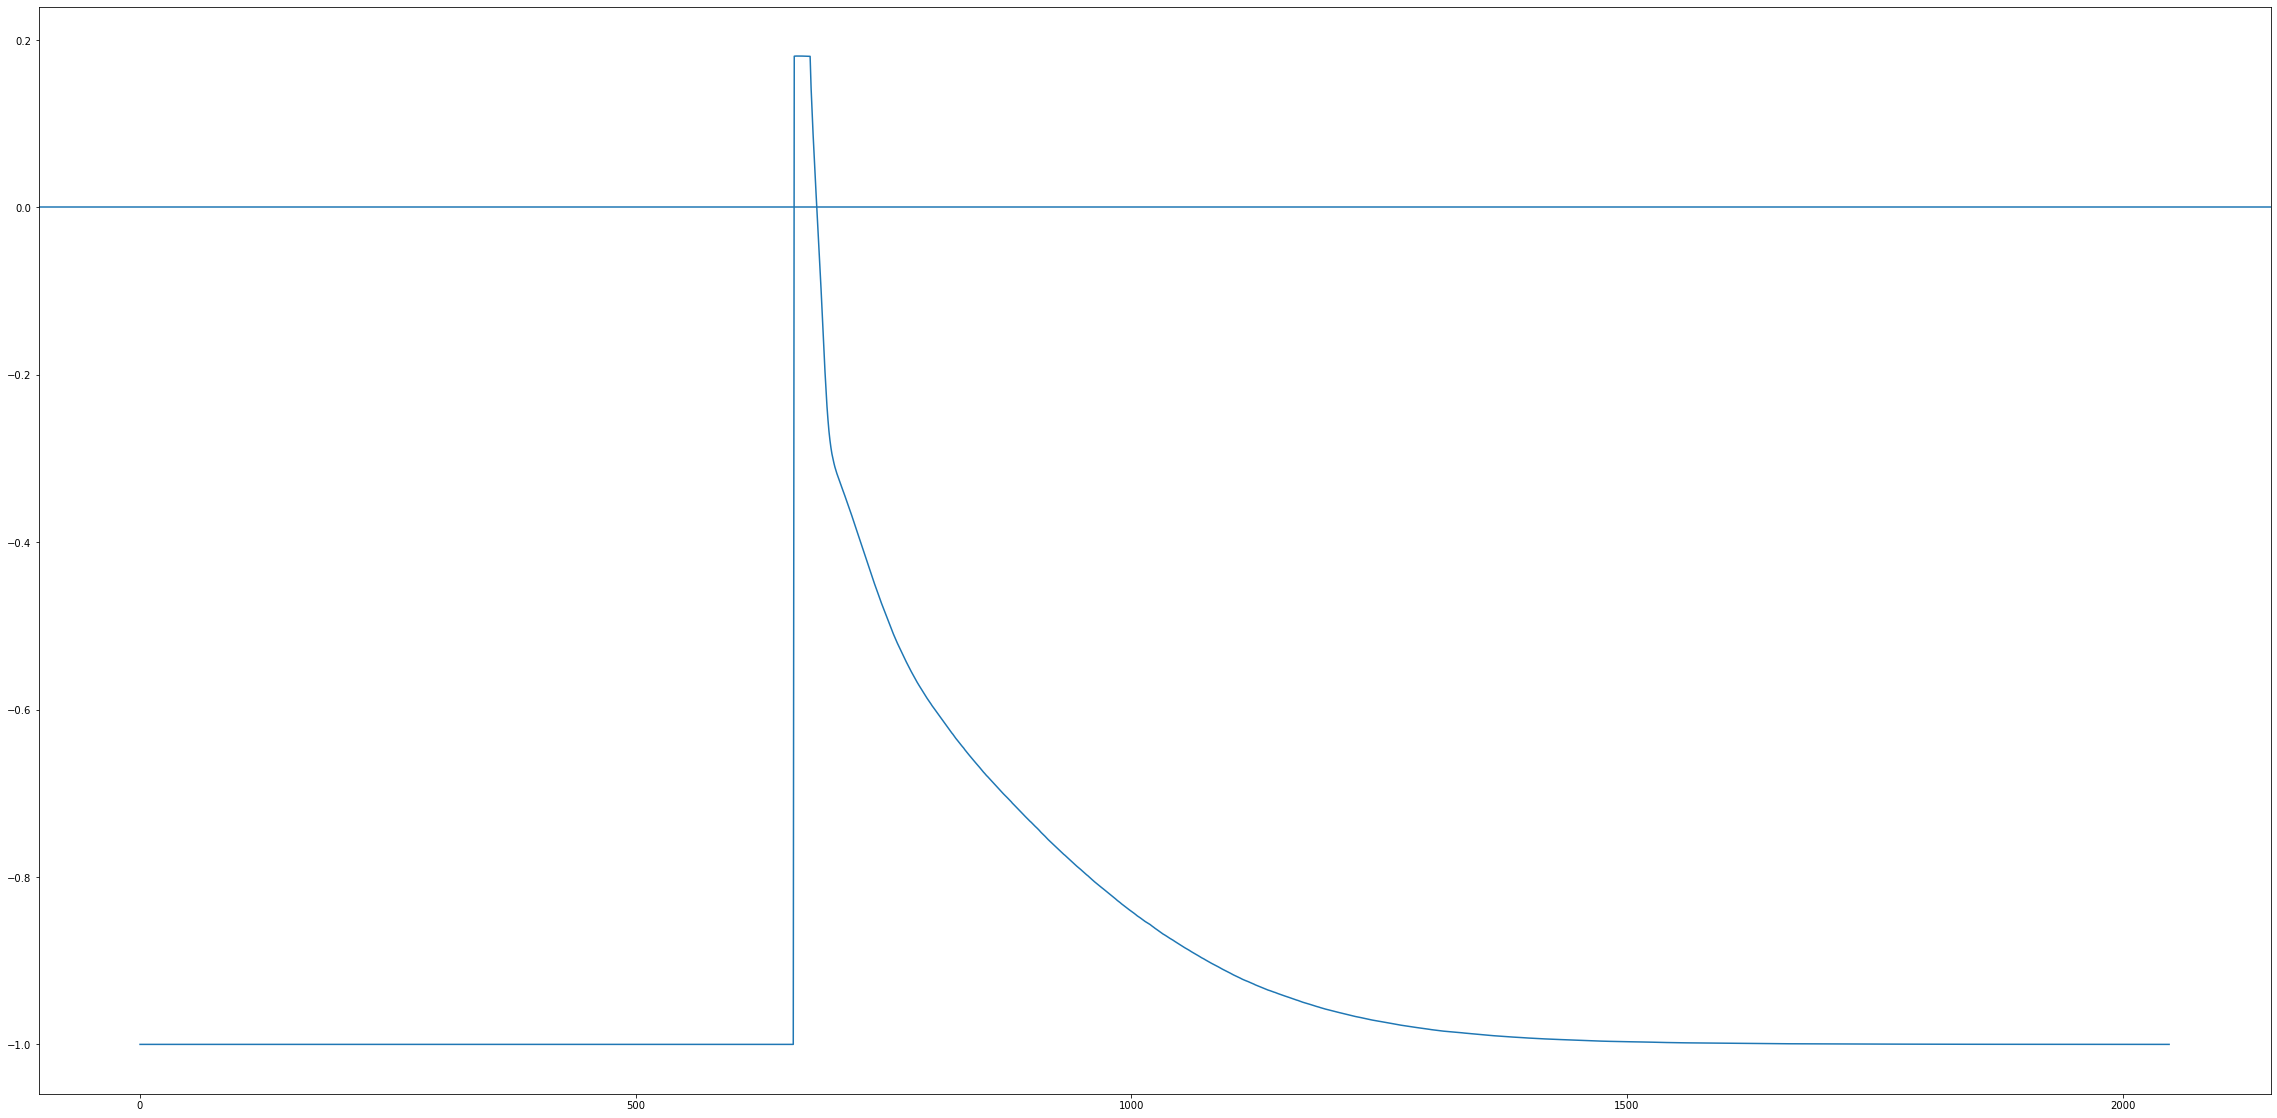

In [42]:
plt.plot(range(2048), np.mean(image_normed.T, axis = 1)/500 - 1)
plt.axhline(0)

In [1]:
from Binaries import *

q_peak = np.array([GLOBAL.q_peak for _ in range(3)])
q_charge = np.array([GLOBAL.q_charge for _ in range(3)])

EventsADC = EventGenerator(["19_19.5"], real_background = False, sigma = 0, split = 1, apply_downsampling = False, floor_trace = False)
EventsADC.files = ["/cr/tempdata01/filip/QGSJET-II/COMPARE/ADC/" + file for file in os.listdir("/cr/tempdata01/filip/QGSJET-II/COMPARE/ADC")]

q_peak = np.array([1, 1, 1])
q_charge = np.array([GLOBAL.q_charge / GLOBAL.q_peak for _ in range(3)])

EventsVEM = EventGenerator(["19_19.5"], real_background = False, sigma = 0, split = 1, q_peak = q_peak, q_charge = q_charge, apply_downsampling = False, floor_trace = False)
EventsVEM.files = ["/cr/tempdata01/filip/QGSJET-II/COMPARE/VEM/" + file for file in os.listdir("/cr/tempdata01/filip/QGSJET-II/COMPARE/VEM")]

In [2]:
tracesVEM = EventsVEM.__getitem__(0)

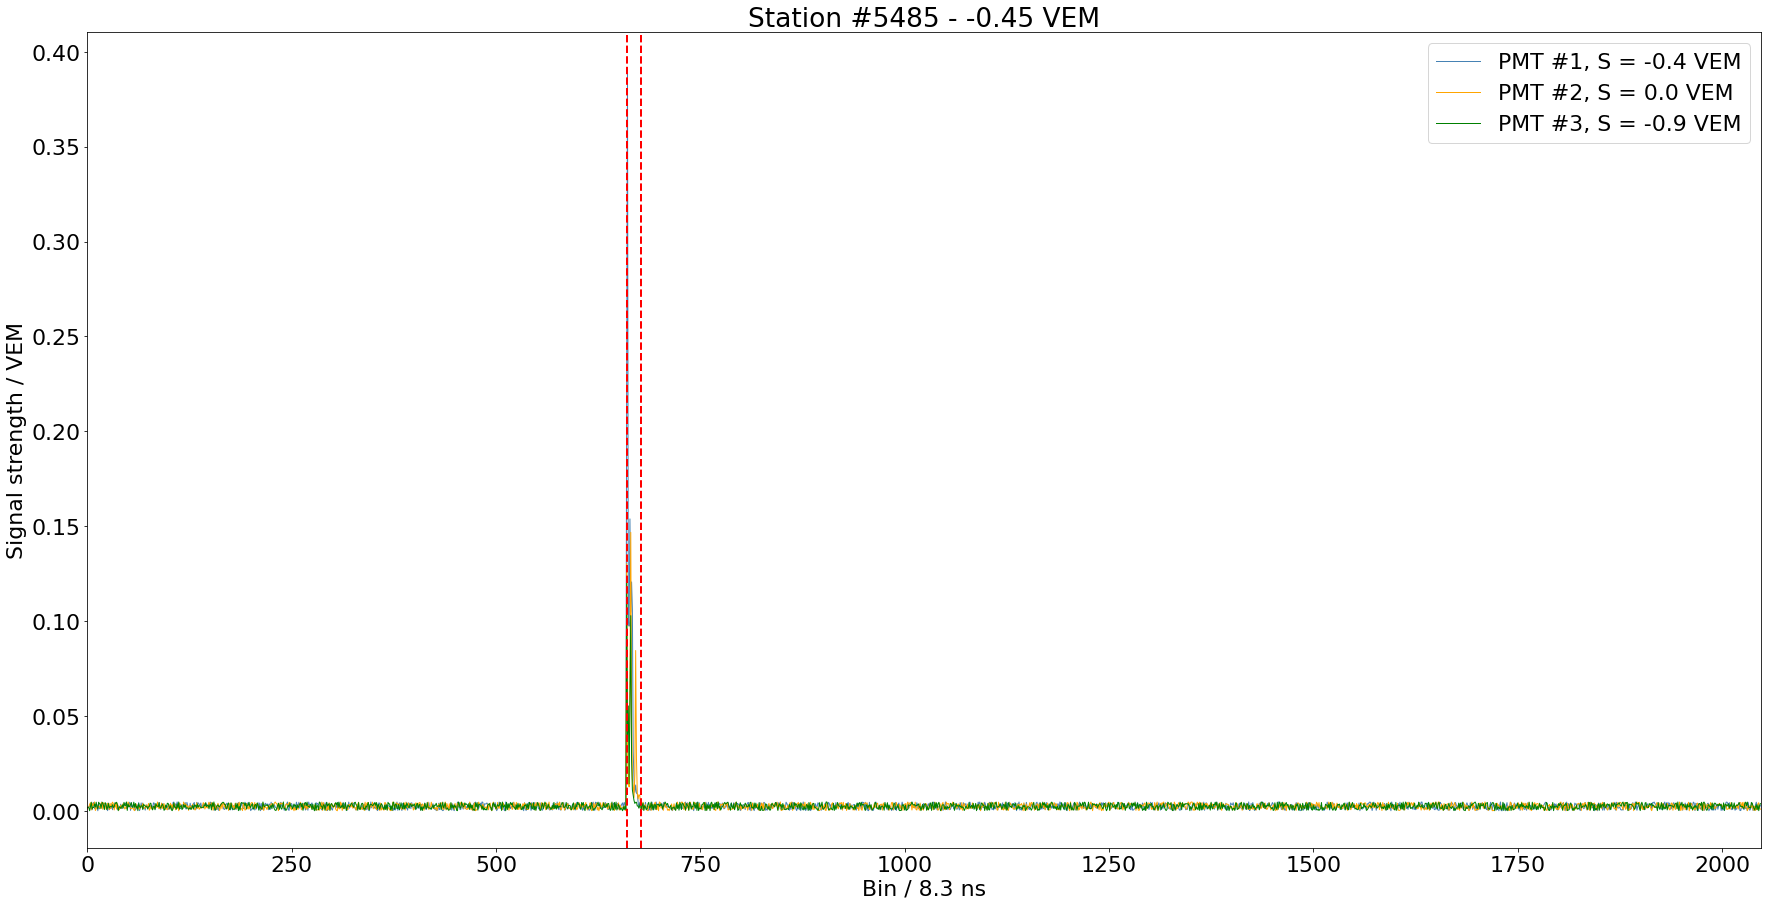

In [3]:
tracesVEM[-1].__plot__()

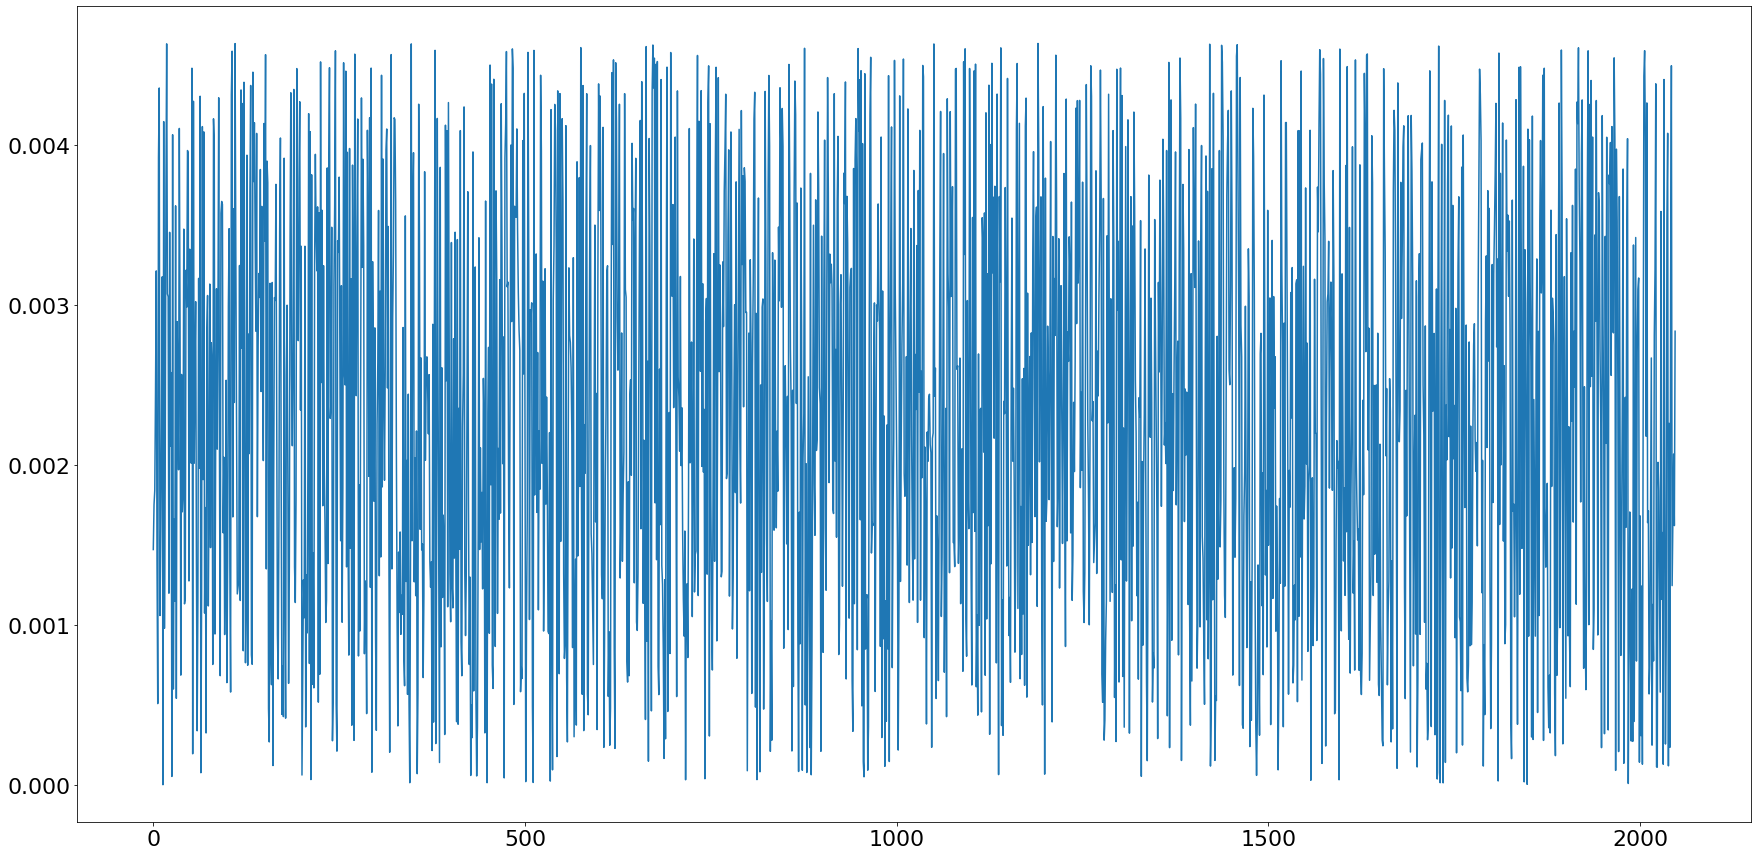

In [4]:
plt.plot(range(2048), tracesVEM[-1].Baseline[0])

In [ ]:
plt.plot(range(2048), np.random.normal(0, 0, 2048))